In [37]:
import csv
import math
import os, os.path
import io
import sys
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Sample Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
model = DecisionTreeClassifier()

In [4]:
dataset = pd.read_csv("../Data/exoplanetarchive/candidates-20190613-TIDIED.csv", header = 24)

In [5]:
original_headers = list(dataset.columns.values)
original_headers

['kepid',
 'kepoi_name',
 'koi_period',
 'koi_period_err1',
 'koi_prad',
 'koi_prad_err1',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_steff',
 'koi_steff_err1',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_srad',
 'koi_srad_err1']

In [10]:
#model.fit(dataset.data, dataset.target)
dataset.head()

,kepid,kepoi_name,koi_period,koi_period_err1,koi_prad,koi_prad_err1,koi_teq,koi_insol,koi_insol_err1,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1
0,1025986,K07621.01,275.073650,0.039280,1.86,0.33,303.0,2.00,0.92,5604.0,84.0,4.226,0.208,1.187,0.207
1,1026957,K00958.01,21.761298,0.000017,2.53,0.16,486.0,13.18,3.00,4859.0,97.0,4.612,0.015,0.720,0.047
2,1161345,K00984.01,4.287467,0.000015,2.29,0.22,942.0,186.31,56.73,5296.0,105.0,4.576,0.015,0.815,0.080
3,1164301,K04921.01,95.688682,0.003599,28.41,1.13,1046.0,283.07,37.83,5040.0,60.0,2.681,0.029,13.056,0.520
4,1293379,K06253.01,27.556452,0.002928,1.40,0.54,531.0,18.86,22.40,5509.0,184.0,4.565,0.024,0.836,0.322


In [90]:
goldilocks_dataset = dataset.drop(['kepid',
                                   'koi_period',
                                   'koi_period_err1',
                                   'koi_prad_err1',
                                   #'koi_insol',
                                   'koi_insol_err1', 
                                   'koi_steff',
                                   'koi_steff_err1',
                                   'koi_slogg',
                                   'koi_slogg_err1',
                                   #'koi_srad',
                                   'koi_srad_err1'],
                                  axis=1)

In [41]:
goldilocks_dataset.head()

,kepoi_name,koi_prad,koi_teq,koi_insol,koi_srad
0,K07621.01,1.86,303.0,2.00,1.187
1,K00958.01,2.53,486.0,13.18,0.720
2,K00984.01,2.29,942.0,186.31,0.815
3,K04921.01,28.41,1046.0,283.07,13.056
4,K06253.01,1.40,531.0,18.86,0.836


In [54]:
goldilocks_dataset.describe()

,koi_prad,koi_teq,koi_insol,koi_srad
count,2315.000000,2315.000000,2318.000000,2315.000000
mean,79.802700,811.860043,1079.972364,1.516442
std,2374.640647,541.847829,11596.625032,4.951602
min,0.220000,25.000000,0.000000,0.109000
25%,1.200000,440.500000,8.950000,0.820500
50%,1.820000,713.000000,60.970000,0.988000
75%,2.970000,1031.500000,267.715000,1.286000
max,109061.000000,6285.000000,369989.680000,152.969000


In [53]:
goldilocks_dataset.dropna().describe()

,koi_prad,koi_teq,koi_insol,koi_srad
count,2315.000000,2315.000000,2315.000000,2315.000000
mean,79.802700,811.860043,1080.991123,1.516442
std,2374.640647,541.847829,11604.099369,4.951602
min,0.220000,25.000000,0.000000,0.109000
25%,1.200000,440.500000,8.910000,0.820500
50%,1.820000,713.000000,60.930000,0.988000
75%,2.970000,1031.500000,267.160000,1.286000
max,109061.000000,6285.000000,369989.680000,152.969000


In [132]:
new_data = goldilocks_dataset.dropna()
X_gold = new_data.dropna().drop("kepoi_name", axis=1)
Y_gold = new_data['kepoi_name']

In [135]:
X_gold.shape

(2315, 4)

In [136]:
Y_gold.shape

(2315,)

In [137]:
new_data.head()

,kepoi_name,koi_prad,koi_teq,koi_insol,koi_srad
0,K07621.01,1.86,303.0,2.00,1.187
1,K00958.01,2.53,486.0,13.18,0.720
2,K00984.01,2.29,942.0,186.31,0.815
3,K04921.01,28.41,1046.0,283.07,13.056
4,K06253.01,1.40,531.0,18.86,0.836


In [87]:
def goldilocks_temp(t):
    if t < 273:
        return "Too cold";
    elif t > 373:
        return "Too hot";
    else:
        return "Just right"

In [128]:
tmp = new_data.drop(["koi_prad","koi_srad"],axis=1)
tmp.tail()

,kepoi_name,koi_teq,koi_insol
2313,K04303.01,327.0,2.72
2314,K05979.01,592.0,29.06
2315,K04245.01,788.0,91.32
2316,K00298.02,397.0,5.85
2317,K02184.02,288.0,1.63


In [129]:
new_data.head()

,kepoi_name,koi_prad,koi_teq,koi_insol,koi_srad
0,K07621.01,1.86,303.0,2.00,1.187
1,K00958.01,2.53,486.0,13.18,0.720
2,K00984.01,2.29,942.0,186.31,0.815
3,K04921.01,28.41,1046.0,283.07,13.056
4,K06253.01,1.40,531.0,18.86,0.836


In [139]:
new_data.insert(3,"gold_temp",[(goldilocks_temp(t)) for t in tmp["koi_teq"]],True)

In [140]:
new_data.head()

,kepoi_name,koi_prad,koi_teq,gold_temp,koi_insol,koi_srad,PCA1,PCA2
0,K07621.01,1.86,303.0,Just right,2.00,1.187,-1091.147980,-78.384070
1,K00958.01,2.53,486.0,Too hot,13.18,0.720,-1075.473488,-77.673375
2,K00984.01,2.29,942.0,Too hot,186.31,0.815,-891.187338,-77.766368
3,K04921.01,28.41,1046.0,Too hot,283.07,13.056,-791.908060,-51.593715
4,K06253.01,1.40,531.0,Too hot,18.86,0.836,-1068.688750,-78.792427


/home/jdowzell/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jdowzell/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


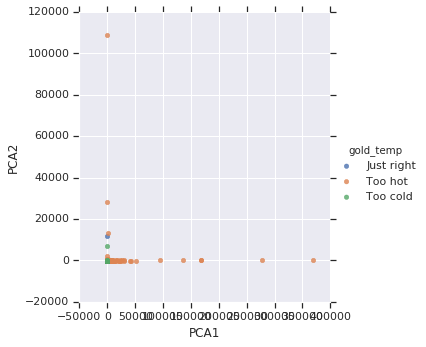

In [141]:
%matplotlib inline
sb.set()
#sb.pairplot(goldilocks_dataset, hue='kepoi_name', height=2.5, diag_kind='hist')
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_gold)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_gold)         # 4. Transform the data to two dimensions

new_data['PCA1'] = X_2D[:, 0]
new_data['PCA2'] = X_2D[:, 1]
sb.lmplot("PCA1", "PCA2", hue='gold_temp', data=new_data, fit_reg=False);

In [142]:
X_2D

array([[-1091.14797976,   -78.38407008],
       [-1075.4734885 ,   -77.67337475],
       [ -891.18733766,   -77.76636783],
       ...,
       [ -989.93372199,   -78.35737253],
       [-1084.988583  ,   -78.60377435],
       [-1091.88668275,   -78.07728265]])